In [1]:
import pandas as pd

# 读取CSV文件
csv_file_path = '/root/Download/AlgaeBloomForecast/filtered_data_2021_2024.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(csv_file_path)

# 尝试将每列转换为数值类型，并统计转换失败的条目
conversion_results = {}
for col in df.columns:
    try:
        # 尝试转换为数值类型，errors='raise'会抛出错误
        df[col] = pd.to_numeric(df[col], errors='raise')
    except ValueError as e:
        # 如果转换失败，记录错误信息和列名
        conversion_results[col] = str(e)

# 打印转换失败的列和错误信息
for col, error in conversion_results.items():
    print(f"列 '{col}' 转换为数值类型失败: {error}")

# 检查哪些列成功转换为数值类型
numeric_columns = [col for col in df.columns if col not in conversion_results]
print("\n成功转换为数值类型的列有：", numeric_columns)

/tmp/ipykernel_3682/2123450879.py:5: DtypeWarning: Columns (10,11,12,13,15,16,21,25,30,31,32,34,38,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


列 'NAME' 转换为数值类型失败: Unable to parse string "LUSI, CH" at position 0
列 'DATE' 转换为数值类型失败: Unable to parse string "2021-01-01 00:00:00" at position 0
列 'REPORT_TYPE' 转换为数值类型失败: Unable to parse string "FM-12" at position 0
列 'QUALITY_CONTROL' 转换为数值类型失败: Unable to parse string "V020" at position 0
列 'AA1' 转换为数值类型失败: Unable to parse string "06,9999,9,9" at position 0
列 'AA2' 转换为数值类型失败: Unable to parse string "24,0000,9,1" at position 0
列 'AA3' 转换为数值类型失败: Unable to parse string "24,9999,9,9" at position 1
列 'AJ1' 转换为数值类型失败: Unable to parse string "9999,9,9,999999,9,9" at position 0
列 'AY1' 转换为数值类型失败: Unable to parse string "0,1,12,1" at position 0
列 'AY2' 转换为数值类型失败: Unable to parse string "0,1,12,1" at position 0
列 'CIG' 转换为数值类型失败: Unable to parse string "99999,9,9,9" at position 0
列 'DEW' 转换为数值类型失败: Unable to parse string "-0091,1" at position 0
列 'ED1' 转换为数值类型失败: Unable to parse string "18,L,9999,9" at position 13854
列 'EQD' 转换为数值类型失败: Unable to parse string "Q01  00002PRCP24" at position 1

根据提供的错误信息和常见的气象数据标准，以下是两个表格，分别对应非数值类型和数值类型的列，包括它们的缩写、可能的含义、数值类型和单位。

### 非数值类型表格

| 列名                  | 缩写 | 含义                          | 数值类型 | 单位   |
|-----------------------|------|------------------------------|----------|--------|
| NAME                  | -    | 站点名称                      | string   | -      |
| DATE                  | -    | 日期和时间                    | datetime | -      |
| REPORT_TYPE           | -    | 报告类型                      | string   | -      |
| QUALITY_CONTROL       | -    | 质量控制代码                  | string   | -      |
| QUALITY_CONTROL.1     | -    | 质量控制代码（可能的重复列）  | string   | -      |
| REM                   | -    | 备注或特殊标记                | string   | -      |

### 数值类型表格

| 列名                  | 缩写 | 含义                          | 数值类型 | 单位               |
|-----------------------|------|------------------------------|----------|--------------------|
| STATION               | -    | 站点编号                      | int      | -                  |
| LATITUDE              | -    | 纬度                          | float    | 度（Decimal degrees）|
| LONGITUDE             | -    | 经度                          | float    | 度（Decimal degrees）|
| ELEVATION             | -    | 海拔高度                      | int或float | 米（meters）       |
| SOURCE                | -    | 数据来源                      | int或float | -                  |
| CALL_SIGN             | -    | 呼叫信号或标识                | string   | -                  |
| AW1                   | -    | 可能表示风向或风速            | float    | 度或米/秒（deg或m/s）|
| CALL_SIGN.1           | -    | 呼叫信号或标识（可能的重复列）| string   | -                  |
| HL1                   | -    | 可能表示高度或能见度         | int或float | 米（meters）       |
| IA1                   | -    | 可能表示冰雹大小              | int      | 毫米（mm）         |
| ME1                   | -    | 可能表示降水量                | float    | 毫米（mm）         |
| MW4                   | -    | 可能表示风速或风向            | float    | 米/秒（m/s）       |
| OA1                   | -    | 可能表示气压或其他气象参数   | float    | 百帕（hPa）        |
| OD2                   | -    | 可能表示降水量或其它           | float    | 毫米（mm）         |
| SA1                   | -    | 可能表示雪量或其它            | float    | 毫米（mm）         |
| SOURCE.1              | -    | 数据来源（可能的重复列）      | int或float | -                  |
| UA1                   | -    | 可能表示风速或温度            | float    | 米/秒或度（m/s或°C）|
| UG1                   | -    | 可能表示地速或风速            | float    | 米/秒（m/s）       |
| YEAR                  | -    | 年份                          | int      | -                  |

请注意，数值类型和单位是根据列名和常见气象数据标准推测的，实际含义可能需要根据数据集的具体文档或元数据来确定。一些列名可能代表多种不同的测量值，具体含义取决于数据集的上下文。例如，'CALL_SIGN'可能表示一个特定的观测站点或观测设备，而'SOURCE'可能表示数据的来源或采集方式。此外，一些列名可能需要进一步的数据探索或领域专家的知识来准确解释。


/tmp/ipykernel_3682/422367828.py:6: DtypeWarning: Columns (10,11,12,13,15,16,21,25,30,31,32,34,38,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


数值类型列的缺失值数量：
STATION             0
LATITUDE            0
LONGITUDE           0
ELEVATION           0
SOURCE              0
CALL_SIGN           0
AW1            224347
CALL_SIGN.1         0
HL1            224347
IA1            224347
ME1            224347
MW4            224347
OA1            224347
OD2            224347
SA1            224347
SOURCE.1            0
UA1            224347
UG1            224347
YEAR                0
dtype: int64

数值类型列的缺失值百分比：
STATION          0.0
LATITUDE         0.0
LONGITUDE        0.0
ELEVATION        0.0
SOURCE           0.0
CALL_SIGN        0.0
AW1            100.0
CALL_SIGN.1      0.0
HL1            100.0
IA1            100.0
ME1            100.0
MW4            100.0
OA1            100.0
OD2            100.0
SA1            100.0
SOURCE.1         0.0
UA1            100.0
UG1            100.0
YEAR             0.0
dtype: float64


/tmp/ipykernel_3682/422367828.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.fillna(numeric_df.mean(), inplace=True)


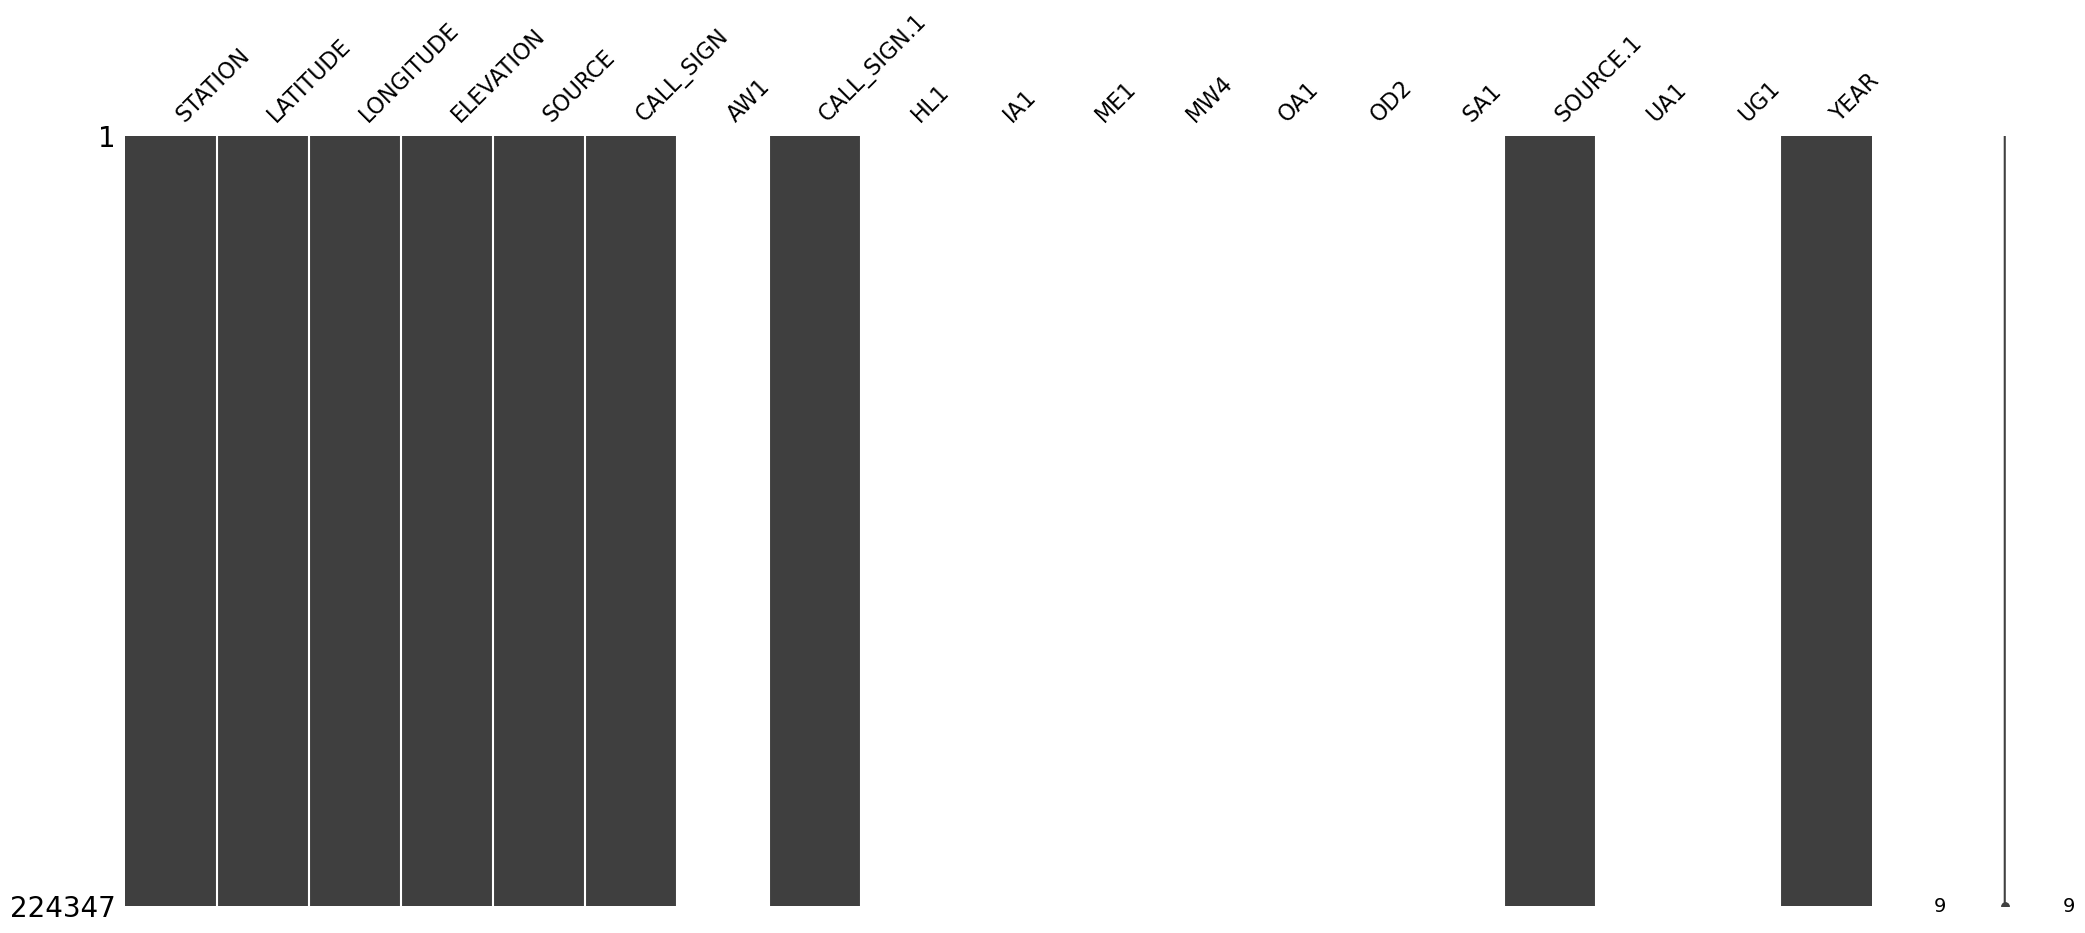

In [3]:
import pandas as pd
import missingno as msno

# 读取CSV文件
csv_file_path = '/root/Download/AlgaeBloomForecast/filtered_data_2021_2024.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(csv_file_path)

# 选择数值类型的列
numeric_columns = ['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 
                   'SOURCE', 'CALL_SIGN', 'AW1', 'CALL_SIGN.1', 'HL1', 
                   'IA1', 'ME1', 'MW4', 'OA1', 'OD2', 'SA1', 'SOURCE.1', 
                   'UA1', 'UG1', 'YEAR']
numeric_df = df[numeric_columns]

# 检查缺失值
missing_values = numeric_df.isnull().sum()
print("数值类型列的缺失值数量：")
print(missing_values)

# 可视化缺失值
msno.matrix(numeric_df)

# 计算缺失值的百分比
missing_values_percent = (numeric_df.isnull().sum() / numeric_df.shape[0]) * 100
print("\n数值类型列的缺失值百分比：")
print(missing_values_percent)

# 处理缺失值（例如，用平均值填充）
# 注意：这只是一个示例，根据你的数据和需求，你可能需要不同的处理方式
numeric_df.fillna(numeric_df.mean(), inplace=True)

In [ ]:
# 列 'AA1' 转换为数值类型失败: Unable to parse string "06,9999,9,9" at position 0
# 列 'AA2' 转换为数值类型失败: Unable to parse string "24,0000,9,1" at position 0
# 列 'AA3' 转换为数值类型失败: Unable to parse string "24,9999,9,9" at position 1
# 列 'AJ1' 转换为数值类型失败: Unable to parse string "9999,9,9,999999,9,9" at position 0
# 列 'AY1' 转换为数值类型失败: Unable to parse string "0,1,12,1" at position 0
# 列 'AY2' 转换为数值类型失败: Unable to parse string "0,1,12,1" at position 0
# 列 'CIG' 转换为数值类型失败: Unable to parse string "99999,9,9,9" at position 0
# 列 'DEW' 转换为数值类型失败: Unable to parse string "-0091,1" at position 0
# 列 'ED1' 转换为数值类型失败: Unable to parse string "18,L,9999,9" at position 13854
# 列 'GA1' 转换为数值类型失败: Unable to parse string "99,9,+04660,1,99,9" at position 400
# 列 'GA2' 转换为数值类型失败: Unable to parse string "08,1,+01006,1,99,9" at position 8605
# 列 'GA3' 转换为数值类型失败: Unable to parse string "08,1,+01006,1,99,9" at position 11885
# 列 'GA4' 转换为数值类型失败: Unable to parse string "02,1,+00914,1,08,1" at position 125670
# 列 'GE1' 转换为数值类型失败: Unable to parse string "9,MSL   ,+99999,+99999" at position 400
# 列 'GF1' 转换为数值类型失败: Unable to parse string "00,99,1,99,9,99,9,99999,9,99,9,99,9" at position 32
# 列 'IA2' 转换为数值类型失败: Unable to parse string "999,-0044,9" at position 0
# 列 'KA1' 转换为数值类型失败: Unable to parse string "240,M,-0007,1" at position 0
# 列 'KA2' 转换为数值类型失败: Unable to parse string "240,N,-0067,1" at position 0
# 列 'MA1' 转换为数值类型失败: Unable to parse string "99999,9,10318,1" at position 0
# 列 'MD1' 转换为数值类型失败: Unable to parse string "2,1,008,1,-043,1" at position 0
# 列 'MW1' 转换为数值类型失败: Unable to parse string "00,1" at position 0
# 列 'MW2' 转换为数值类型失败: Unable to parse string "61,1" at position 9447
# 列 'MW3' 转换为数值类型失败: Unable to parse string "61,1" at position 75059
# 列 'OC1' 转换为数值类型失败: Unable to parse string "0053,1" at position 1
# 列 'OD1' 转换为数值类型失败: Unable to parse string "4,12,0037,1,308" at position 0
# 列 'SLP' 转换为数值类型失败: Unable to parse string "10325,1" at position 0
# 列 'TMP' 转换为数值类型失败: Unable to parse string "-0050,1" at position 0
# 列 'VIS' 转换为数值类型失败: Unable to parse string "009600,1,9,9" at position 0
# 列 'WND' 转换为数值类型失败: Unable to parse string "269,1,N,0016,1" at position 0

In [4]:
import pandas as pd

# 读取CSV文件
csv_file_path = '/root/Download/AlgaeBloomForecast/filtered_data_2021_2024.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(csv_file_path)

# 指定需要查看的列名
columns_to_check = [
    'AA1', 'AA2', 'AA3', 'AJ1', 'AY1', 'AY2', 'CIG', 'DEW', 'ED1',
    'GA1', 'GA2', 'GA3', 'GA4', 'GE1', 'GF1', 'IA2', 'KA1', 'KA2',
    'MA1', 'MD1', 'MW1', 'MW2', 'MW3', 'OC1', 'OD1', 'SLP', 'TMP',
    'VIS', 'WND'
]

# 打印每列的前20行数据
for column in columns_to_check:
    print(f"Data for column '{column}':")
    print(df[column].head(20))
    print("\n")  # 打印空行以便区分不同列的输出

/tmp/ipykernel_3682/1973893560.py:5: DtypeWarning: Columns (10,11,12,13,15,16,21,25,30,31,32,34,38,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


Data for column 'AA1':
0     06,9999,9,9
1     06,9999,9,9
2     06,9999,9,9
3     06,9999,9,9
4     06,9999,9,9
5     06,9999,9,9
6     06,9999,9,9
7     06,9999,9,9
8     06,9999,9,9
9     06,9999,9,9
10    06,9999,9,9
11    06,9999,9,9
12    06,9999,9,9
13    06,9999,9,9
14    06,9999,9,9
15    06,9999,9,9
16    06,9999,9,9
17    06,9999,9,9
18    06,9999,9,9
19    06,9999,9,9
Name: AA1, dtype: object


Data for column 'AA2':
0     24,0000,9,1
1     12,9999,9,9
2     24,0000,9,1
3     12,9999,9,9
4     24,0000,9,1
5     12,9999,9,9
6     12,9999,9,9
7     12,9999,9,9
8     24,0000,9,1
9     12,9999,9,9
10    24,0000,9,1
11    12,9999,9,9
12    24,0000,9,1
13    12,9999,9,9
14    12,9999,9,9
15    12,9999,9,9
16    24,0000,9,1
17    12,9999,9,9
18    24,0000,9,1
19    12,9999,9,9
Name: AA2, dtype: object


Data for column 'AA3':
0             NaN
1     24,9999,9,9
2             NaN
3     24,9999,9,9
4             NaN
5     24,9999,9,9
6     24,9999,9,9
7     24,9999,9,9
8            

In [5]:
import pandas as pd

# 读取CSV文件
csv_file_path = '/root/Download/AlgaeBloomForecast/filtered_data_2021_2024.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(csv_file_path)

# 指定需要检查的列名
columns_to_check = [
    'AW1', 'HL1', 'IA1', 'ME1', 'MW4', 'OA1', 'OD2', 'SA1', 'UA1', 'UG1',
    'ED1', 'GA1', 'GA2', 'GA3', 'GA4', 'GE1', 'GF1', 'MW2', 'MW3'
]

# 检查每列是否全部是缺失值
all_na_columns = []
for column in columns_to_check:
    if df[column].isna().all():
        all_na_columns.append(column)

# 打印结果
if all_na_columns:
    print("以下列全部是缺失值:")
    print(all_na_columns)
else:
    print("没有列全部是缺失值。")

/tmp/ipykernel_3682/1728494542.py:5: DtypeWarning: Columns (10,11,12,13,15,16,21,25,30,31,32,34,38,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


以下列全部是缺失值:
['AW1', 'HL1', 'IA1', 'ME1', 'MW4', 'OA1', 'OD2', 'SA1', 'UA1', 'UG1']


In [7]:
import pandas as pd

# 读取CSV文件
csv_file_path = '/root/Download/AlgaeBloomForecast/filtered_data_2021_2024.csv'
df = pd.read_csv(csv_file_path)

# 指定需要检查的列名
columns_to_check = [
    'AW1', 'HL1', 'IA1', 'ME1', 'MW4', 'OA1', 'OD2', 'SA1', 'UA1', 'UG1',
    'ED1', 'GA1', 'GA2', 'GA3', 'GA4', 'GE1', 'GF1', 'MW2', 'MW3'
]

# 检查并打印每列的最大值和最小值，或所有唯一值
for column in columns_to_check:
    if column in df.columns:
        # 检查数据类型是否为数值类型
        if pd.api.types.is_numeric_dtype(df[column]):
            max_value = df[column].max()
            min_value = df[column].min()
            print(f"列 '{column}' 的最大值是: {max_value}")
            print(f"列 '{column}' 的最小值是: {min_value}\n")
        else:
            unique_values = df[column].unique()
            print(f"列 '{column}' 不是数值类型，所有唯一值有: {unique_values}")
            print(f"唯一值的数量: {len(unique_values)}\n")
    else:
        print(f"列 '{column}' 不在数据中。\n")

/tmp/ipykernel_3682/3974164161.py:5: DtypeWarning: Columns (10,11,12,13,15,16,21,25,30,31,32,34,38,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


列 'AW1' 的最大值是: nan
列 'AW1' 的最小值是: nan

列 'HL1' 的最大值是: nan
列 'HL1' 的最小值是: nan

列 'IA1' 的最大值是: nan
列 'IA1' 的最小值是: nan

列 'ME1' 的最大值是: nan
列 'ME1' 的最小值是: nan

列 'MW4' 的最大值是: nan
列 'MW4' 的最小值是: nan

列 'OA1' 的最大值是: nan
列 'OA1' 的最小值是: nan

列 'OD2' 的最大值是: nan
列 'OD2' 的最小值是: nan

列 'SA1' 的最大值是: nan
列 'SA1' 的最小值是: nan

列 'UA1' 的最大值是: nan
列 'UA1' 的最小值是: nan

列 'UG1' 的最大值是: nan
列 'UG1' 的最小值是: nan

列 'ED1' 不是数值类型，所有唯一值有: [nan '18,L,9999,9' '36,R,9999,9' '35,R,9999,9' '17,L,9999,9' '07,U,9999,9'
 '25,U,9999,9' '06,U,9999,9' '24,U,9999,9']
唯一值的数量: 9

列 'GA1' 不是数值类型，所有唯一值有: [nan '99,9,+04660,1,99,9' '99,9,+06330,1,99,9' '99,9,+01160,1,99,9'
 '99,9,+01460,1,99,9' '99,9,+00450,1,99,9' '99,9,+00100,1,99,9'
 '99,9,+00110,1,99,9' '99,9,+00290,1,99,9' '99,9,+00250,1,99,9'
 '99,9,+00230,1,99,9' '99,9,+00270,1,99,9' '99,9,+00210,1,99,9'
 '99,9,+00400,1,99,9' '99,9,+01800,1,99,9' '99,9,+00490,1,99,9'
 '99,9,+01410,1,99,9' '99,9,+00800,1,99,9' '99,9,+00680,1,99,9'
 '99,9,+00700,1,99,9' '99,9,+00430,1,99,9' '99